# Entrenamientos

A continuacion una exploracion de los datos que brinda Garmin de mis entrenamientos. La informacion la obtuve de la pagina de Garmin Connect, una aplicacion que almacena los entrenamientos con la informacion de cada uno.

## Importo librerias utiles

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

## Carga, inspeccion y transformacion de datos

In [3]:
act = pd.read_csv("../running.csv")

act.shape

(222, 41)

Tenemos 222 registros con 41 features para cada uno. Esto es, 222 actividades con 41 caracteristicas.

In [4]:
act.sample(5)

,Tipo de actividad,Fecha,Favorito,Título,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,FC máxima,Cadencia de carrera media,...,Ritmo máximo de respiración,Cambio en estrés,Inicio del periodo de estrés,Fin del periodo de estrés,Estrés medio,Estrés máximo,Tiempo en movimiento,Tiempo transcurrido,Altura mínima,Altura máxima
127,Carrera,2023-09-18 19:42:52,False,Ciudad de Buenos Aires - 3x1k/1'30,7.90,584,00:44:28,160,192,162,...,--,--,--,--,--,--,00:43:12,00:45:16,4,40
202,Carrera,2023-03-21 15:07:40,False,Ciudad de Buenos Aires - Carrera de progresión,7.58,534,00:40:00,166,192,163,...,--,--,--,--,--,--,00:39:58,00:45:31,-6,39
91,Carrera,2023-12-12 19:41:30,False,Ciudad de Buenos Aires - 3x1k/1'30,7.29,552,00:41:55,161,193,149,...,--,--,--,--,--,--,00:38:47,00:43:29,-6,41
10,Carrera,2024-07-05 18:16:47,False,Ciudad de Buenos Aires - 7x1k/1' (4'40/4'20),12.34,950,01:05:10,168,191,164,...,--,--,--,--,--,--,01:02:01,01:05:51,5,38
24,Carrera,2024-06-02 17:53:45,False,Ciudad de Buenos Aires - 60' (5'45 - 5'15) con...,10.99,859,01:00:02,166,185,166,...,--,--,--,--,--,--,01:00:01,01:00:02,4,37


Inspeccionemos las columnas. Desde ya vemos que hay un problema en el formato. Contienen espacios en blanco, no estan en minusculas y poseen letras con tildes. Esto resulta fastidioso a la hora de acceder a los datos.

In [5]:
act.columns

Index(['Tipo de actividad', 'Fecha', 'Favorito', 'Título', 'Distancia',
       'Calorías', 'Tiempo', 'Frecuencia cardiaca media', 'FC máxima',
       'Cadencia de carrera media', 'Cadencia de carrera máxima',
       'Ritmo medio', 'Ritmo óptimo', 'Ascenso total', 'Descenso total',
       'Longitud media de zancada', 'Relación vertical media',
       'Oscilación vertical media', 'Tiempo medio de contacto con el suelo',
       'Training Stress Score®', 'Dificultad', 'Fluidez', 'Swolf medio',
       'Velocidad media de palada', 'Repeticiones totales', 'Descompresión',
       'Mejor tiempo de vuelta', 'Número de vueltas', 'Temperatura máxima',
       'Ritmo respiratorio medio', 'Ritmo mínimo de respiración',
       'Ritmo máximo de respiración', 'Cambio en estrés',
       'Inicio del periodo de estrés', 'Fin del periodo de estrés',
       'Estrés medio', 'Estrés máximo', 'Tiempo en movimiento',
       'Tiempo transcurrido', 'Altura mínima', 'Altura máxima'],
      dtype='object')

### Transformo nombres de columnas.

Llevo los nombres a minuscula, reemplazo las letras con tildes por las mismas sin y reemplazo los espacios en blanco por guiones bajos. Basicamente llevo a formato **snake_case**. Para ello:

1) Me armo un diccionario donde mapeo la letra que quiero reemplazar con la que la reemplaza.
2) Creo un patron donde voy a tener las letras que quiero reemplazar.
3) Busco, para el nombre de cada columna, si contiene letras que quiero reemplazar y guardo cuales son.
4) Reemplazo las letras.

Ejemplo con una oracion:

In [6]:
to_replace = {"á":"a","é":"e","í":"i","ó":"o","ú":"u","ñ":"n"," ":"_"}
patron = re.compile('|'.join(to_replace.keys())) # [á|é|í|ó|ú|ñ| ]
# Defino una oracion y busco los caracteres que matchean.
o1 = 'La música está muy fuerte'
matches = patron.findall(o1)
print(matches)
# Y ahora reemplazo para cada uno. Hago un set para que no siga con repetidos.
for match in set(matches):
    print(match, to_replace[match])
    o1 = o1.replace(match, to_replace[match])
print(o1)

[' ', 'ú', ' ', 'á', ' ', ' ']
  _
ú u
á a
La_musica_esta_muy_fuerte


Ahora con los nombres de las columnas.

In [7]:
# Diccionario con mapeo para reemplazar.
to_replace = {"á":"a","é":"e","í":"i","ó":"o","ú":"u","ñ":"n"," ":"_"}
patron = re.compile('|'.join(to_replace.keys())) # [á|é|í|ó|ú|ñ| ]

def to_snake_case(col_name):
    # Cambio nombre de la columna. Llevo a minusculas, reemplazo espacios en blanco por _ y letras con tildes por las mismas sin.
    col_name  = col_name.lower()
    matches = patron.findall(col_name) # Busco coincidencias, si las hay reemplazo.
    if matches:
        for match in set(matches):
            col_name = col_name.replace(match,to_replace[match])
    return col_name    

In [8]:
act.columns = [to_snake_case(col) for col in act.columns]
act.columns

Index(['tipo_de_actividad', 'fecha', 'favorito', 'titulo', 'distancia',
       'calorias', 'tiempo', 'frecuencia_cardiaca_media', 'fc_maxima',
       'cadencia_de_carrera_media', 'cadencia_de_carrera_maxima',
       'ritmo_medio', 'ritmo_optimo', 'ascenso_total', 'descenso_total',
       'longitud_media_de_zancada', 'relacion_vertical_media',
       'oscilacion_vertical_media', 'tiempo_medio_de_contacto_con_el_suelo',
       'training_stress_score®', 'dificultad', 'fluidez', 'swolf_medio',
       'velocidad_media_de_palada', 'repeticiones_totales', 'descompresion',
       'mejor_tiempo_de_vuelta', 'numero_de_vueltas', 'temperatura_maxima',
       'ritmo_respiratorio_medio', 'ritmo_minimo_de_respiracion',
       'ritmo_maximo_de_respiracion', 'cambio_en_estres',
       'inicio_del_periodo_de_estres', 'fin_del_periodo_de_estres',
       'estres_medio', 'estres_maximo', 'tiempo_en_movimiento',
       'tiempo_transcurrido', 'altura_minima', 'altura_maxima'],
      dtype='object')

### Recorto el dataframe

Veamos ahora que tipo de actividades hay registradas y que datos son interesantes.

In [9]:
act.tipo_de_actividad.value_counts()

tipo_de_actividad
Carrera                   219
Ciclismo                    1
Entrenamiento en cinta      1
Trabajo de respiración      1
Name: count, dtype: int64

Voy a quedarme solo con las carreras.

In [10]:
run = act[act.tipo_de_actividad == "Carrera"]

In [11]:
run.iloc[0] # Inspecciono un registro para ver que datos trae.

tipo_de_actividad                                                      Carrera
fecha                                                      2024-07-31 19:23:59
favorito                                                                 False
titulo                                   Ciudad de Buenos Aires - 3x1k /3' Vo2
distancia                                                                 9.02
calorias                                                                   717
tiempo                                                                00:50:41
frecuencia_cardiaca_media                                                  166
fc_maxima                                                                  195
cadencia_de_carrera_media                                                  165
cadencia_de_carrera_maxima                                                 248
ritmo_medio                                                               5:37
ritmo_optimo                                        

Muchas columnas estan repletas de NaN, afortunadamente la mayoria no son de interes (salvo dificultad) por lo que las voy a borrar.


Me armo un array con los indices de las columnas que quiero mantener.

In [12]:
for index, colname in enumerate(act.columns):
    print(index, colname)

0 tipo_de_actividad
1 fecha
2 favorito
3 titulo
4 distancia
5 calorias
6 tiempo
7 frecuencia_cardiaca_media
8 fc_maxima
9 cadencia_de_carrera_media
10 cadencia_de_carrera_maxima
11 ritmo_medio
12 ritmo_optimo
13 ascenso_total
14 descenso_total
15 longitud_media_de_zancada
16 relacion_vertical_media
17 oscilacion_vertical_media
18 tiempo_medio_de_contacto_con_el_suelo
19 training_stress_score®
20 dificultad
21 fluidez
22 swolf_medio
23 velocidad_media_de_palada
24 repeticiones_totales
25 descompresion
26 mejor_tiempo_de_vuelta
27 numero_de_vueltas
28 temperatura_maxima
29 ritmo_respiratorio_medio
30 ritmo_minimo_de_respiracion
31 ritmo_maximo_de_respiracion
32 cambio_en_estres
33 inicio_del_periodo_de_estres
34 fin_del_periodo_de_estres
35 estres_medio
36 estres_maximo
37 tiempo_en_movimiento
38 tiempo_transcurrido
39 altura_minima
40 altura_maxima


In [13]:
indices = np.array((1,3,4,5,6,7,8,11,13,14,39,40))
act.columns.values[indices]

array(['fecha', 'titulo', 'distancia', 'calorias', 'tiempo',
       'frecuencia_cardiaca_media', 'fc_maxima', 'ritmo_medio',
       'ascenso_total', 'descenso_total', 'altura_minima',
       'altura_maxima'], dtype=object)

In [14]:
run = run[run.columns.values[indices]]
run.shape

(219, 12)

Pasamos de 41 columnas a 12. Y de 222 actividades a 219.

### Transformo los tipos de datos

Veamos ahora que tipo de datos se almacenan en estas columnas.

In [15]:
run.dtypes

fecha                        object
titulo                       object
distancia                    object
calorias                     object
tiempo                       object
frecuencia_cardiaca_media     int64
fc_maxima                     int64
ritmo_medio                  object
ascenso_total                object
descenso_total               object
altura_minima                object
altura_maxima                object
dtype: object

Tengo que transformar varios tipos para trabajarlos mas facil.

 - A date --> fecha
 - A time --> tiempo, ritmo_medio, tiempo_en_movimiento, tiempo_transcurrido
 - A float/int --> distancia, calorias, ascenso_total, descenso_total, altura_minimia, altura_maxima

Arranco por la fecha. Para trabajar con fechas ~importo datetime~ uso el tipo de dato datetime de pandas.

In [16]:
run.fecha = pd.to_datetime(run.fecha, format="%Y-%m-%d %H:%M:%S")
run.fecha

0     2024-07-31 19:23:59
1     2024-07-26 18:57:16
2     2024-07-24 18:12:00
3     2024-07-21 19:04:20
4     2024-07-19 17:31:37
              ...        
217   2023-02-16 19:34:51
218   2023-02-14 20:21:18
219   2023-02-11 20:23:02
220   2023-02-09 19:32:05
221   2023-02-07 20:04:40
Name: fecha, Length: 219, dtype: datetime64[ns]

Algo que podemos hacer ahora es crear columnas para anio, mes y dia. Nos valemos de la fecha para ello.

In [17]:
run['anio'] = run.fecha.apply(lambda x: x.year)
run['mes'] = run.fecha.apply(lambda x: x.month)
run['dia'] = run.fecha.apply(lambda x: x.day)

Tambien agrego el dia de la semana en que fue el entrenamiento. Primero hay que sacar que dia fue cuando se realizo el entrenamiento. Como tenemos la fecha en datetime podemos usar el metodo **weekday** para ver que dia de la semana fue. Vienen en enteros arrancando por 0-Lunes,1-Martes,etc..

In [18]:
run['dia_semana'] = run.fecha.apply(lambda f: f.weekday())

In [19]:
run[["fecha","anio","mes","dia",'dia_semana']].sample(5)

,fecha,anio,mes,dia,dia_semana
187,2023-05-30 15:49:25,2023,5,30,1
23,2024-06-05 18:50:30,2024,6,5,2
44,2024-04-07 18:09:45,2024,4,7,6
15,2024-06-23 16:09:09,2024,6,23,6
85,2023-12-27 19:18:44,2023,12,27,2


Sigo con los tiempos, el metodo es el mismo solo que ahora me quedo con el time. Si quiero convertir usando el formato en el que vienen los datos, HH:MM:SS, me arroja error. Por lo que se lee del error es que hay algun registro mal formateado, le sobran datos al parsear:

`ValueError: unconverted data remains when parsing with format "%H:%M:%S": ".1", at position 64. You might want to try`..

Si los datos vienen en formato HH:MM:SS, podemos filtrar por alguna cadena de longitud mayor a 8. Creo una mascara booleana para obtener los registros con longitud mayor a 8 y filtro con ella para arreglar el error.

In [20]:
# pd.to_datetime(run.tiempo, format = "%H:%M:%S").dt.time # arroja error nombrado anteriormente.
mask = run.tiempo.apply(len) > 8
print(mask.sum())
print(run.loc[mask].tiempo)
# La arreglo, le saco lo que sobra.
run.loc[mask,"tiempo"] = "00:06:19"

1
64    00:06:19.1
Name: tiempo, dtype: object


Ahora si convierto. Como esto me va a cambiar el tipo de dato voy a agregarlo en una nueva columna. Este tipo, timedelta, es mas comodo para trabajar con tiempos.

In [21]:
run["tiempo_timedelta"] = pd.to_timedelta(run.tiempo)

Voy a hacer lo mismo con ritmo medio. Si quiero pasarlo a timedelta me pide que tenga formato HH:MM:SS. Me estan faltando HH:M, que son todos 0.

In [22]:
# Agrego 00:0 a cada str para converitr.
run['ritmo_medio_timedelta'] = pd.to_timedelta('00:0' + run.ritmo_medio)
run.ritmo_medio_timedelta

0     0 days 00:05:37
1     0 days 00:05:56
2     0 days 00:05:50
3     0 days 00:05:48
4     0 days 00:05:15
            ...      
217   0 days 00:06:02
218   0 days 00:06:58
219   0 days 00:06:24
220   0 days 00:06:25
221   0 days 00:05:21
Name: ritmo_medio_timedelta, Length: 219, dtype: timedelta64[ns]

Ahora convierto a enteros o flotantes. Las columnas a transformar eran:

distancia, calorias, ascenso_total, descenso_total, altura_minimia, altura_maxima.

In [23]:
run.distancia = run.distancia.apply(float)
run.ascenso_total = run.ascenso_total.apply(int)
run.altura_minima = run.altura_minima.apply(int)
run.altura_maxima = run.altura_maxima.apply(int)

Y las siguientes dos arrojan errores. Ambas por errores en los datos.

- run.descenso_total.apply(float) --> ValueError: could not convert string to float: '--'
- run.calorias.apply(int) --> ValueError: invalid literal for int() with base 10: '1,235'

In [24]:
# run.descenso_total.apply(float) 
mask = run.descenso_total == "--"
run[mask]

,fecha,titulo,distancia,calorias,tiempo,frecuencia_cardiaca_media,fc_maxima,ritmo_medio,ascenso_total,descenso_total,altura_minima,altura_maxima,anio,mes,dia,dia_semana,tiempo_timedelta,ritmo_medio_timedelta
221,2023-02-07 20:04:40,Junín - Benchmark Run,1.68,130,00:09:00,178,190,5:21,2,--,68,76,2023,2,7,1,0 days 00:09:00,0 days 00:05:21


In [25]:
run.loc[mask,"descenso_total"] = "0"
run['descenso_total'] = run.descenso_total.apply(float)

In [26]:
# run.calorias.apply(int) 
run['calorias'] = run.calorias.apply(lambda x: int(x.replace(",","")))
run.dtypes

fecha                         datetime64[ns]
titulo                                object
distancia                            float64
calorias                               int64
tiempo                                object
frecuencia_cardiaca_media              int64
fc_maxima                              int64
ritmo_medio                           object
ascenso_total                          int64
descenso_total                       float64
altura_minima                          int64
altura_maxima                          int64
anio                                   int64
mes                                    int64
dia                                    int64
dia_semana                             int64
tiempo_timedelta             timedelta64[ns]
ritmo_medio_timedelta        timedelta64[ns]
dtype: object

Y finalmente, antes de visualizar, busco si hay valores faltantes.

In [27]:
run.isna().sum().sum()

np.int64(0)

## Visualizacion


Ahora si. Podemos visualizar los datos. Comenzamos visualizando la cantidad de entrenamientos por anio.

### Cantidad de entrenamientos por anio

#### Bar plot

Cantidad de entrenamientos por anio

In [28]:
runs_by_year = run.anio.value_counts(dropna=False)
runs_by_year

anio
2023    134
2024     85
Name: count, dtype: int64

In [29]:
print(f'Hay una diferencia de {runs_by_year[2023] - runs_by_year[2024]} entrenamientos entre 2023 y 2024')

Hay una diferencia de 49 entrenamientos entre 2023 y 2024


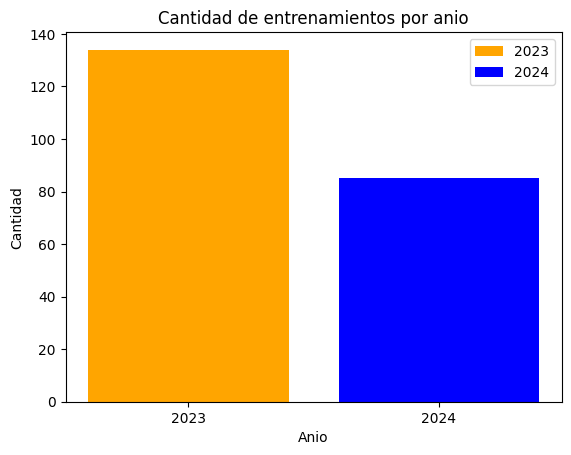

In [30]:
years=['2023','2024']
color_dict = {2023:'orange',2024:'blue'}

fig, ax = plt.subplots()

ax.bar(x=years, height = runs_by_year.values, color=color_dict.values(), label = color_dict.keys())
ax.set_title("Cantidad de entrenamientos por anio")
ax.set_xlabel("Anio")
ax.set_ylabel("Cantidad")
ax.legend()
plt.show()

#### Pie chart

Cantidad de entrenamientos por anio. Necesito los porcentajes del total para cada anio.

In [31]:
total_runs = run.shape[0]
percentage_run_by_year = round(run.anio.value_counts() / total_runs,3) * 100
print(percentage_run_by_year)

anio
2023    61.2
2024    38.8
Name: count, dtype: float64


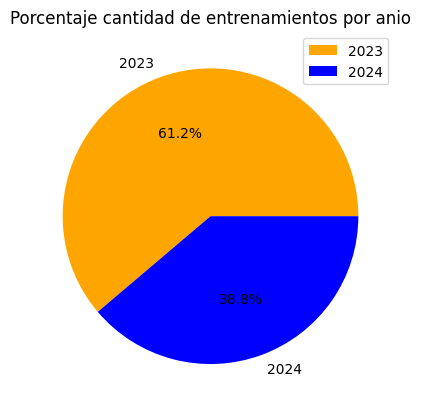

In [32]:
sizes = percentage_run_by_year.values
fig, ax = plt.subplots()
ax.pie(sizes,labels = years,autopct='%1.1f%%', colors = color_dict.values())
ax.set_title('Porcentaje cantidad de entrenamientos por anio')
ax.legend()
plt.show()

### Cantidad de entrenamientos por mes y anio.

Para esto necesito indexar por mes y contar cuantos hubo en cada anio.

In [33]:
run_by_month_year = run.pivot_table('titulo',index='mes',columns='anio', aggfunc="count", fill_value=0)
run_by_month_year

anio,2023,2024
mes,,
1,0,11
2,10,14
3,12,14
4,8,10
5,3,11
6,17,13
7,17,12
8,17,0
9,12,0


In [34]:
months_in_spanish = [
    "Enero", 
    "Febrero", 
    "Marzo", 
    "Abril", 
    "Mayo", 
    "Junio", 
    "Julio", 
    "Agosto", 
    "Septiembre", 
    "Octubre", 
    "Noviembre", 
    "Diciembre"
]

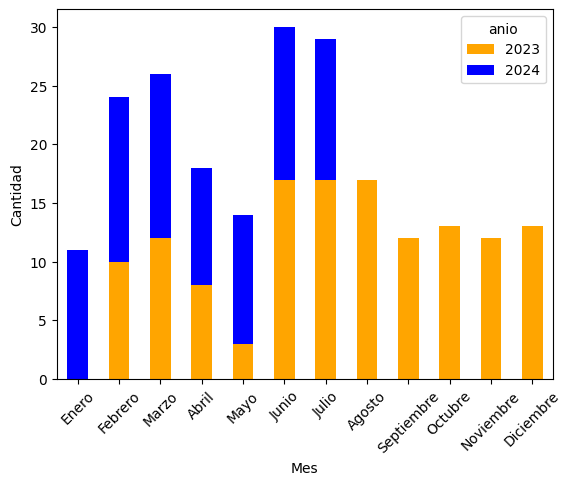

In [35]:
# Le cambio el indice que eran enteros.
run_by_month_year.index = months_in_spanish
run_by_month_year.plot.bar(stacked=True, rot=45, xlabel="Mes", ylabel="Cantidad", color = color_dict.values())
plt.show()
# Agregar labels

### Kilometros por anio


Veamos cuantos kilometros corri a lo largo de cada anio. Agrupo los datos por anio y sumo las distancias.

In [36]:
kms_per_year = round(run.groupby('anio').aggregate({'distancia':'sum'}).distancia)
kms_per_year

anio
2023    1310.0
2024     838.0
Name: distancia, dtype: float64

In [37]:
diff = kms_per_year.max() - kms_per_year.min()
anio_max = kms_per_year.idxmax()
anio_min = kms_per_year.idxmin()
print(f'Corri {int(diff)} kilometros mas en {anio_max} que en {anio_min}')

Corri 472 kilometros mas en 2023 que en 2024


In [38]:
diff = runs_by_year.max() - runs_by_year.min()
anio_max = runs_by_year.idxmax()
anio_min = runs_by_year.idxmin()

print(f'Esta diferencia se ve en los {diff} entrenamientos que tengo de más en {anio_max}')

Esta diferencia se ve en los 49 entrenamientos que tengo de más en 2023


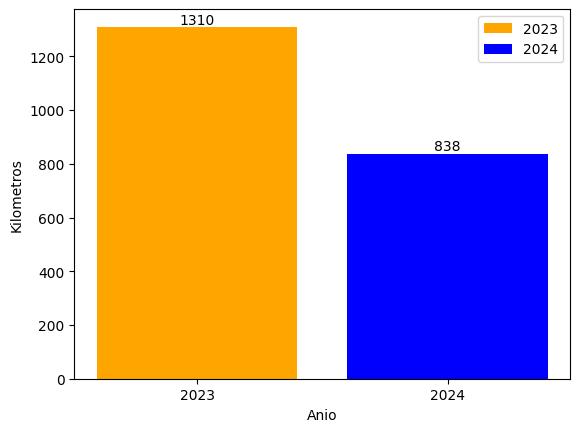

In [39]:
kms_per_year = round(run.groupby('anio').aggregate({'distancia':'sum'}).distancia)

fig, ax = plt.subplots()

for anio, kilometros in kms_per_year.items():
    b = ax.bar(str(anio), kilometros, label = anio, color = color_dict[anio])
    ax.bar_label(b, label_type='edge')
ax.set_xlabel("Anio")
ax.set_ylabel("Kilometros")
ax.legend()
plt.show()

### Kilometros por mes y anio

Y ahora veamos kilometros por mes y anio. Ahora en lugar de contar entrenamientos, sumo kilometros.

In [40]:
kms_per_month_year = run.pivot_table('distancia', index = 'mes', columns = 'anio', aggfunc='sum', fill_value=0)
kms_per_month_year

anio,2023,2024
mes,,
1,0.00,87.41
2,74.94,123.59
3,103.56,114.96
4,95.02,120.38
5,21.03,109.53
6,129.19,142.11
7,190.31,140.39
8,197.11,0.00
9,145.32,0.00


In [41]:
kms_per_month_year.index = months_in_spanish

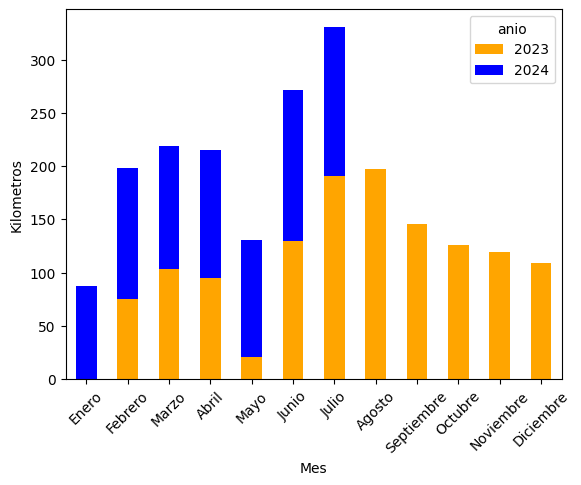

In [42]:
kms_per_month_year.plot.bar(stacked=True, rot=45, xlabel="Mes", ylabel="Kilometros", color = color_dict.values())
plt.show()
# Agregar labels sobre las barras.

Puedo hacerlo por separado..

In [43]:
kms_per_month_2023 = kms_per_month_year[2023]
kms_per_month_2024 = kms_per_month_year[2024]

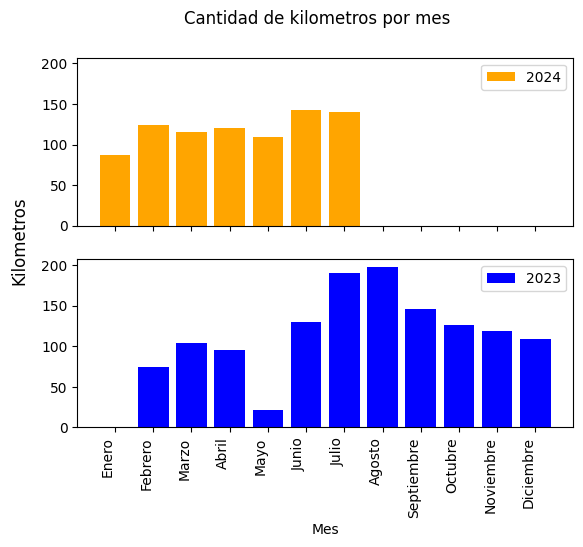

In [44]:
fig, ax = plt.subplots(2, sharex=True, sharey=True)

fig.supylabel('Kilometros')
fig.suptitle('Cantidad de kilometros por mes')

ax[0].bar(x = kms_per_month_2024.index, height = kms_per_month_2024.values, color=color_dict[2023], label = '2024')
ax[0].legend()

ax[1].bar(x = kms_per_month_2024.index, height = kms_per_month_2023.values, color=color_dict[2024], label = '2023')
ax[1].legend()
ax[1].set_xticks(range(len(kms_per_month_2024.index)))
ax[1].set_xticklabels(kms_per_month_2024.index,rotation=90, ha="right")
ax[1].set_xlabel('Mes')
plt.show()

In [45]:
max_per_row = kms_per_month_year.max(axis=1)
min_per_row = kms_per_month_year.min(axis=1)
diff = max_per_row - min_per_row
max_year_per_row = kms_per_month_year.idxmax(axis=1)
min_year_per_row = kms_per_month_year.idxmin(axis=1)

for month in kms_per_month_year.index:
    print(f'- {month} de {max_year_per_row[month]} tiene {int(diff[month])} kilometros mas que {month} de {min_year_per_row[month]}.')

- Enero de 2024 tiene 87 kilometros mas que Enero de 2023.
- Febrero de 2024 tiene 48 kilometros mas que Febrero de 2023.
- Marzo de 2024 tiene 11 kilometros mas que Marzo de 2023.
- Abril de 2024 tiene 25 kilometros mas que Abril de 2023.
- Mayo de 2024 tiene 88 kilometros mas que Mayo de 2023.
- Junio de 2024 tiene 12 kilometros mas que Junio de 2023.
- Julio de 2023 tiene 49 kilometros mas que Julio de 2024.
- Agosto de 2023 tiene 197 kilometros mas que Agosto de 2024.
- Septiembre de 2023 tiene 145 kilometros mas que Septiembre de 2024.
- Octubre de 2023 tiene 125 kilometros mas que Octubre de 2024.
- Noviembre de 2023 tiene 119 kilometros mas que Noviembre de 2024.
- Diciembre de 2023 tiene 109 kilometros mas que Diciembre de 2024.


### Agosto 2023

Veamos el mes de Agosto del anio 2023, que fue el mes con mas kilometros realizados.

In [46]:
agosto_2023 = run[ (run.mes == 8) & (run.anio == 2023) ]
agosto_2023

,fecha,titulo,distancia,calorias,tiempo,frecuencia_cardiaca_media,fc_maxima,ritmo_medio,ascenso_total,descenso_total,altura_minima,altura_maxima,anio,mes,dia,dia_semana,tiempo_timedelta,ritmo_medio_timedelta
136,2023-08-31 14:50:00,Ciudad de Buenos Aires - 40' reg + 4x20 prog,7.62,585,00:45:24,154,174,5:58,109,113.0,-2,35,2023,8,31,3,0 days 00:45:24,0 days 00:05:58
137,2023-08-29 08:13:31,Ciudad de Buenos Aires - 40' regenerativos,5.15,362,00:40:04,122,139,7:47,100,100.0,4,25,2023,8,29,1,0 days 00:40:04,0 days 00:07:47
138,2023-08-27 07:09:57,Ciudad de Buenos Aires Carrera,21.31,1543,01:52:41,161,185,5:17,336,336.0,-3,55,2023,8,27,6,0 days 01:52:41,0 days 00:05:17
139,2023-08-26 15:14:48,Ciudad de Buenos Aires - 15' reg + 4 prog,3.31,255,00:20:13,152,173,6:07,62,61.0,4,36,2023,8,26,5,0 days 00:20:13,0 days 00:06:07
140,2023-08-24 18:53:24,Ciudad de Buenos Aires - 30' suaves,4.91,358,00:30:02,147,167,6:07,99,103.0,5,39,2023,8,24,3,0 days 00:30:02,0 days 00:06:07
141,2023-08-23 15:38:43,Ciudad de Buenos Aires - 5x200 /30,6.14,473,00:35:52,159,181,5:50,98,100.0,4,36,2023,8,23,2,0 days 00:35:52,0 days 00:05:50
142,2023-08-21 19:32:22,Ciudad de Buenos Aires - 1x1k/1' + 2x500/30,6.23,460,00:35:47,156,186,5:45,102,91.0,6,38,2023,8,21,0,0 days 00:35:47,0 days 00:05:45
143,2023-08-19 15:52:19,Junín - 50' prog con cuestas,8.17,633,00:50:04,156,169,6:08,23,25.0,74,90,2023,8,19,5,0 days 00:50:04,0 days 00:06:08
144,2023-08-17 19:22:44,Ciudad de Buenos Aires - 12k cambios de ritmo,15.77,1237,01:26:18,177,194,5:28,181,186.0,1,38,2023,8,17,3,0 days 01:26:18,0 days 00:05:28
145,2023-08-15 19:04:14,Ciudad de Buenos Aires - 8x1k/1',13.36,1039,01:14:23,172,192,5:34,178,184.0,4,38,2023,8,15,1,0 days 01:14:23,0 days 00:05:34


In [47]:
cantidad_entrenos_agosto_2023 = agosto_2023.shape[0]
km_agosto_2023 = agosto_2023.distancia.sum()
tiempo_agosto_2023 = round(agosto_2023.tiempo_timedelta.sum().seconds / 3600)
promedio_tiempo_agosto_2023 = round(agosto_2023.tiempo_timedelta.mean().seconds / 3600, 2)
promedio_kilometros_agosto_2023 = round(agosto_2023.distancia.mean(),2)

In [48]:
print(f"""
Algunos datos de Agosto 2023.

Cantidad de entrenamientos: {cantidad_entrenos_agosto_2023}
Total de kilometros: {km_agosto_2023}
Horas entrenando: {tiempo_agosto_2023}
Promedio tiempo por entrenamiento: {promedio_tiempo_agosto_2023} horas. 
Promedio kilometros por entrenamiento {promedio_kilometros_agosto_2023}
""")


Algunos datos de Agosto 2023.

Cantidad de entrenamientos: 17
Total de kilometros: 197.11
Horas entrenando: 19
Promedio tiempo por entrenamiento: 1.11 horas. 
Promedio kilometros por entrenamiento 11.59



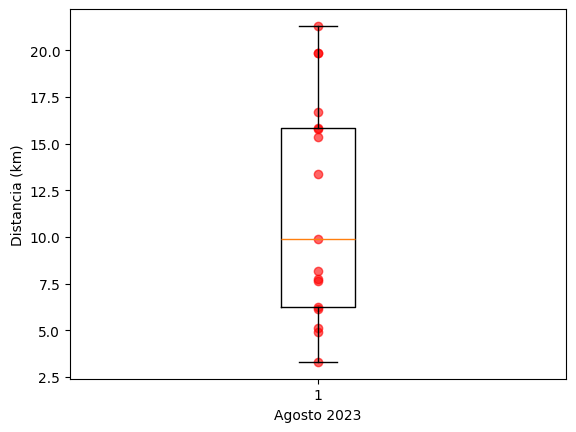

In [49]:
fig, ax = plt.subplots()

ax.boxplot(agosto_2023.distancia)
ax.set_xlabel('Agosto 2023')
ax.set_ylabel('Distancia (km)')
# Agrego los puntos sobre la caja. Son puntos de la forma (1,distancia)
ax.scatter(np.ones(agosto_2023.distancia.shape), agosto_2023.distancia, color='r', alpha=0.6)
plt.show()

Separando por dia. Tengo los dias en enteros, los reemplazo por sus correspondientes strings. Ademas ordeno los datos para graficar en orden correcto.

In [50]:
agosto_2023 = agosto_2023.sort_values('dia_semana')

In [51]:
days_of_week_dict = {
    0: "Lunes",
    1: "Martes",
    2: "Miércoles",
    3: "Jueves",
    4: "Viernes",
    5: "Sábado",
    6: "Domingo"
}

agosto_2023['dia_semana'] = agosto_2023.dia_semana.replace(days_of_week_dict)

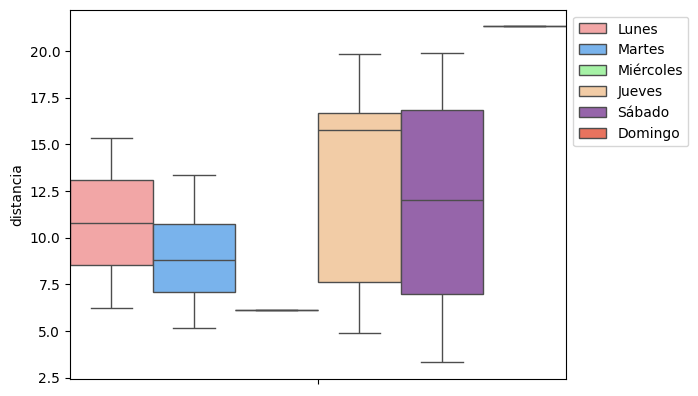

In [52]:
color_dict_days = {
    "Lunes": "#FF9999",
    "Martes": "#66B3FF",
    "Miércoles": "#99FF99",
    "Jueves": "#FFCC99",
    "Viernes": "#FFD700",
    "Sábado": "#9B59B6",
    "Domingo": "#FF6347"
}
ax = sns.boxplot(data=agosto_2023, y='distancia', hue='dia_semana', width=1, palette=color_dict_days)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Veamos la semana con mas kilometros dentro del mes

In [53]:
agosto_2023['week_number'] = agosto_2023.fecha.apply(lambda f: f.week)

In [54]:
agosto_2023.groupby('week_number').aggregate({'distancia':'sum'})

,distancia
week_number,
31,42.37
32,62.77
33,37.30
34,41.90
35,12.77


La semana con mas kilometros fue la 32, con un total de 62.77 km. Veamos los entrenamientos de esta semana y cuanto tiempo entrene.

In [55]:
mask = agosto_2023.week_number == 32
agosto_2023[mask]

,fecha,titulo,distancia,calorias,tiempo,frecuencia_cardiaca_media,fc_maxima,ritmo_medio,ascenso_total,descenso_total,altura_minima,altura_maxima,anio,mes,dia,dia_semana,tiempo_timedelta,ritmo_medio_timedelta,week_number
149,2023-08-07 19:09:15,Ciudad de Buenos Aires - 1x3k 2x2k 3x1k /1',15.34,1097,01:23:39,160,183,5:27,186,198.0,4,36,2023,8,7,Lunes,0 days 01:23:39,0 days 00:05:27,32
148,2023-08-08 16:16:13,Ciudad de Buenos Aires - 50' z1 z2,7.73,564,00:50:02,139,156,6:28,61,68.0,-3,57,2023,8,8,Martes,0 days 00:50:02,0 days 00:06:28,32
147,2023-08-10 19:02:37,Ciudad de Buenos Aires - 3x5k /1',19.84,1467,01:50:01,165,182,5:33,227,229.0,-3,36,2023,8,10,Jueves,0 days 01:50:01,0 days 00:05:33,32
146,2023-08-12 15:24:50,Junín - 2h prog con cuestas,19.86,1487,02:00:04,155,168,6:03,111,119.0,68,95,2023,8,12,Sábado,0 days 02:00:04,0 days 00:06:03,32


In [56]:
agosto_2023[mask][['titulo','distancia','tiempo']]

,titulo,distancia,tiempo
149,Ciudad de Buenos Aires - 1x3k 2x2k 3x1k /1',15.34,01:23:39
148,Ciudad de Buenos Aires - 50' z1 z2,7.73,00:50:02
147,Ciudad de Buenos Aires - 3x5k /1',19.84,01:50:01
146,Junín - 2h prog con cuestas,19.86,02:00:04


In [57]:
week_hours = round(agosto_2023[mask].tiempo_timedelta.sum().seconds / 3600,1)
week_trains = len(agosto_2023[mask])
print(f'En esa semana entrene {week_hours} horas entre los {week_trains} entrenamientos.')

En esa semana entrene 6.1 horas entre los 4 entrenamientos.


### Cantidad de entrenamientos por dia de semana

En el anio 2023 solia entrenar 4 dias a la semana. Lunes-Martes-Jueves-Sabado. En la mayoria del 2024 entreno 3 dias por semana. Miercoles-Viernes-Domingo. Veamos si esto se refleja.

Agrupemos la cantidad de entrenamientos por dia de la semana y graficamos.

In [58]:
count_by_weekday = run.groupby('dia_semana').aggregate({'titulo':'count'}).titulo
count_by_weekday.index = days_of_week_dict.values()
count_by_weekday

Lunes        22
Martes       45
Miércoles    31
Jueves       43
Viernes      20
Sábado       34
Domingo      24
Name: titulo, dtype: int64

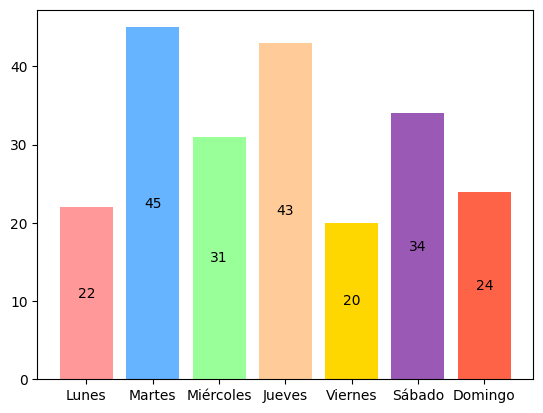

In [59]:
fig, ax = plt.subplots()

for day, count in count_by_weekday.items():
    b = ax.bar(day,count, label=day, color = color_dict_days[day])
    ax.bar_label(b, label_type= 'center')

plt.show()

In [60]:
count_by_weekday_year = run.pivot_table(values='titulo', index='dia_semana', columns = ['anio'], aggfunc='count')
count_by_weekday_year

anio,2023,2024
dia_semana,,
0,14,8
1,37,8
2,9,22
3,33,10
4,3,17
5,29,5
6,9,15


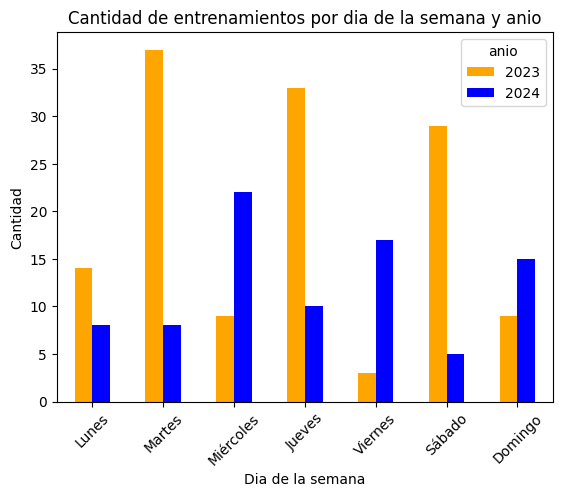

In [61]:
count_by_weekday_year.index = days_of_week_dict.values()
ax = count_by_weekday_year.plot.bar(rot=45, color = color_dict.values())
ax.set_ylabel('Cantidad')
ax.set_xlabel('Dia de la semana')
ax.set_title('Cantidad de entrenamientos por dia de la semana y anio')
plt.show()
# Agregar labels

Mismo grafico pero stackeado.

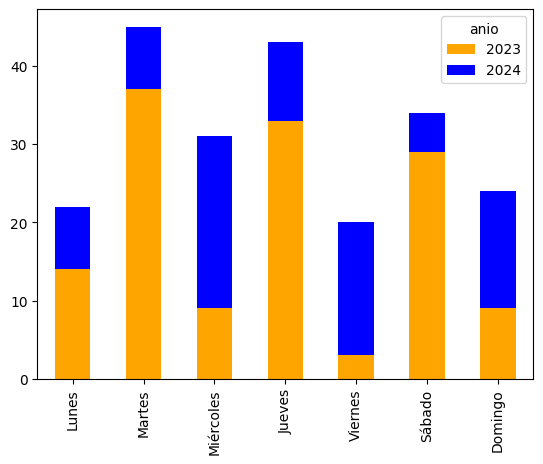

In [62]:
count_by_weekday_year.plot.bar(stacked=True, color = color_dict)
plt.show()
#Agregar labels

### Tiempos

Veamos el tiempo que le dedico a entrenar. Por ejemplo, duracion de entrenamientos por dia. Como voy a trabajar con series de tiempo mejor sera indexar por fecha. 

Voy a usar la libreria Plotly que permite hacer mejores graficos al trabajar con series de tiempo, incluso son interactivos.

In [ ]:
import plotly.express as px

#### Duracion de entrenamientos por dia

In [93]:
run_by_day = run.set_index('fecha', drop=True) # indexo por fecha y borro la columna.
run_by_day.index

DatetimeIndex(['2024-07-31 19:23:59', '2024-07-26 18:57:16',
               '2024-07-24 18:12:00', '2024-07-21 19:04:20',
               '2024-07-19 17:31:37', '2024-07-17 15:11:59',
               '2024-07-14 10:20:30', '2024-07-12 18:54:19',
               '2024-07-10 07:14:09', '2024-07-07 15:38:55',
               ...
               '2023-02-28 20:19:37', '2023-02-26 08:10:23',
               '2023-02-23 20:29:39', '2023-02-22 20:03:17',
               '2023-02-18 14:48:07', '2023-02-16 19:34:51',
               '2023-02-14 20:21:18', '2023-02-11 20:23:02',
               '2023-02-09 19:32:05', '2023-02-07 20:04:40'],
              dtype='datetime64[ns]', name='fecha', length=219, freq=None)

In [95]:
run_by_day['tiempo_minutos'] = round(run_by_day.tiempo_timedelta.apply(lambda t: t.seconds / 60),2)
run_by_day['tiempo_horas'] = round(run_by_day.tiempo_timedelta.apply(lambda t: t.seconds / 3600),1)

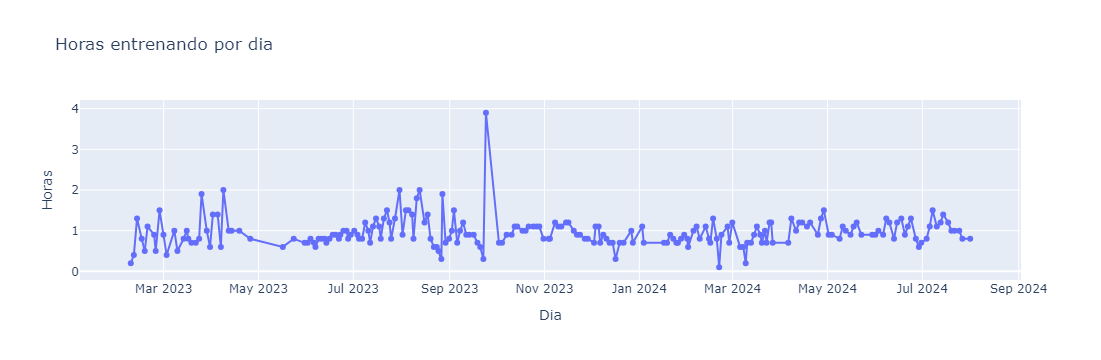

In [90]:
fig = px.line(run_by_day, y="tiempo_horas", markers=True, labels={'fecha':'Dia','tiempo_horas':'Horas'}, title='Horas entrenando por dia')
fig.show()

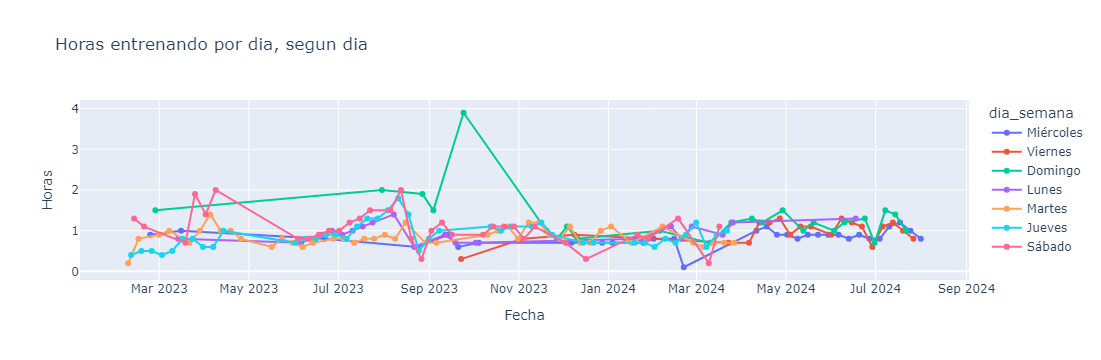

In [97]:
run_by_day['dia_semana'] = run_by_day.dia_semana.replace(days_of_week_dict)
fig = px.line(run_by_day, y="tiempo_horas",color='dia_semana', markers=True, labels={'fecha':'Fecha','tiempo_horas':'Horas'}, title='Horas entrenando por dia, segun dia')
fig.show()

Si bien pensaba que la diferencia iba a ser mas notoria, cuando se hace zoom a un periodo puede verse que las lineas rosa y verde (sabado y domingo) tienen mayor altura que las de la semana. Normal ya que los fin de semana suele hacerse el fondo.

La mayoria de los entrenamientos rondan la hora de duracion.

#### Distancia en funcion de tiempo

Veamos si hay correlacion entre la duracion de la actividad y la distancia cubierta.

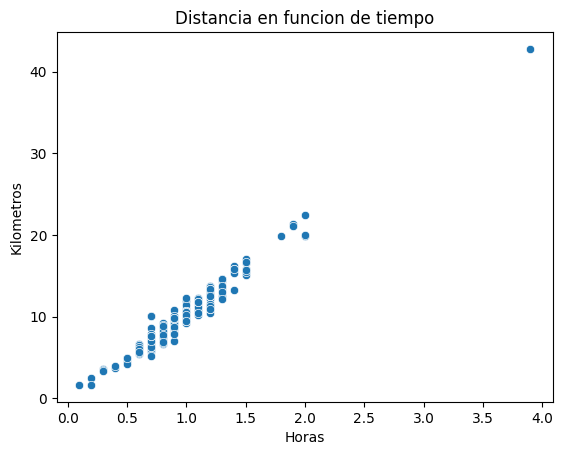

In [108]:
sns.scatterplot(run_by_day, x='tiempo_horas', y='distancia',)
plt.title('Distancia en funcion de tiempo')
plt.xlabel('Horas')
plt.ylabel('Kilometros')
plt.show()

Y si la hay entre la duracion de la actividad y las calorias gastadas.

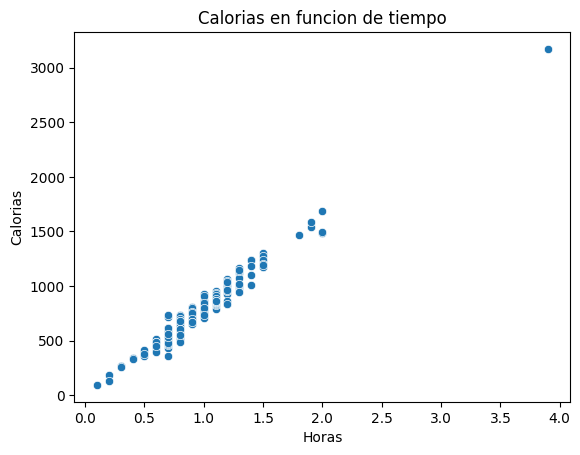

In [109]:
sns.scatterplot(run_by_day, x='tiempo_horas', y='calorias')
plt.title('Calorias en funcion de tiempo')
plt.xlabel('Horas')
plt.ylabel('Calorias')
plt.show()

Las relaciones son casi lineales.

In [113]:
run[run.distancia == run.distancia.max()]

,fecha,titulo,distancia,calorias,tiempo,frecuencia_cardiaca_media,fc_maxima,ritmo_medio,ascenso_total,descenso_total,altura_minima,altura_maxima,anio,mes,dia,dia_semana,tiempo_timedelta,ritmo_medio_timedelta
124,2023-09-24 07:06:22,Ciudad de Buenos Aires Carrera,42.77,3172,03:54:33,167,187,5:29,359,358.0,-24,55,2023,9,24,6,0 days 03:54:33,0 days 00:05:29
